# CNN Filter Visualization

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


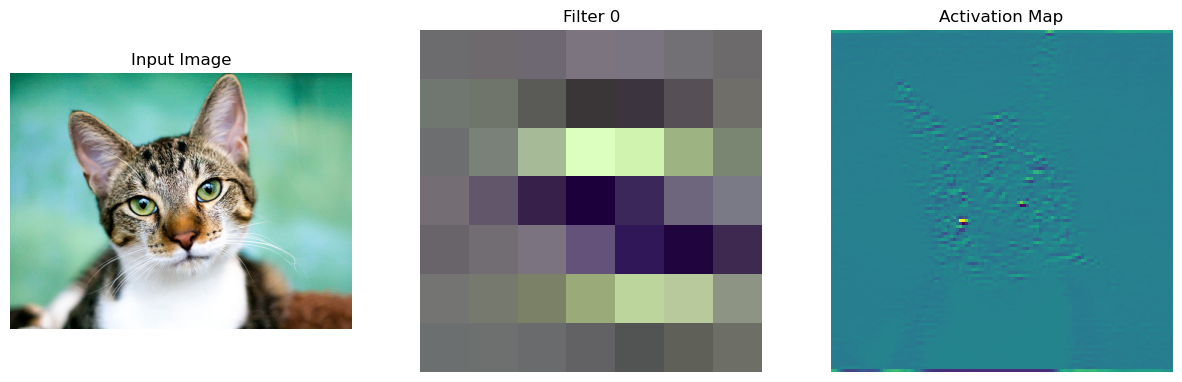

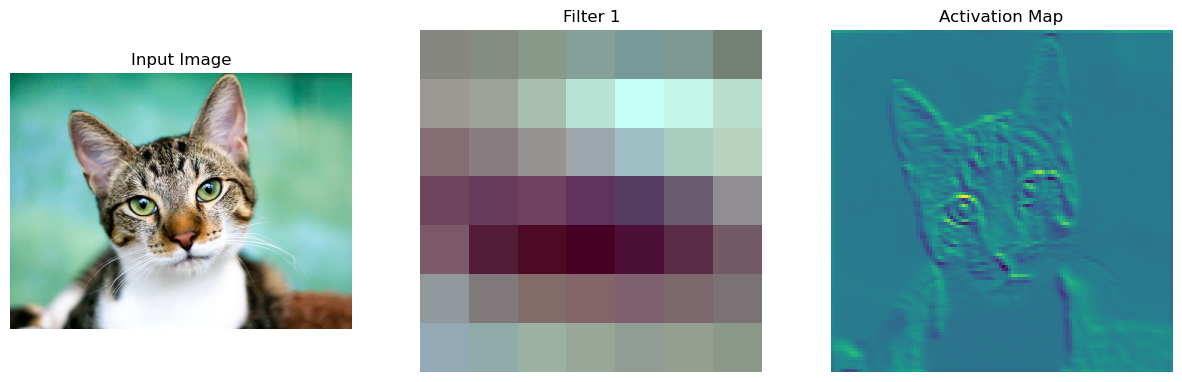

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

# Load pre-trained ResNet-18 model
model = resnet18(pretrained=True)
model.eval()

# Load and preprocess an example image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

# Get the first layer filters
first_layer = model.conv1

# Widgets for interaction
filter_selector = widgets.IntSlider(value=0, min=0, max=first_layer.weight.shape[0]-1, description='Filter:')
image_upload = widgets.FileUpload(accept='image/*', multiple=False)

def visualize_filter(filter_index, image):
    # Prepare input image
    input_tensor = transform(image).unsqueeze(0)

    # Get the filter and activation map
    filter_weights = first_layer.weight[filter_index].detach().cpu().numpy()
    with torch.no_grad():
        activation_map = first_layer(input_tensor)[0, filter_index].detach().cpu().numpy()

    # Visualize the filter
    filter_viz = filter_weights.transpose(1, 2, 0)
    filter_viz = (filter_viz - filter_viz.min()) / (filter_viz.max() - filter_viz.min())

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(np.array(image))
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    axs[1].imshow(filter_viz)
    axs[1].set_title(f'Filter {filter_index}')
    axs[1].axis('off')

    axs[2].imshow(activation_map, cmap='viridis')
    axs[2].set_title('Activation Map')
    axs[2].axis('off')

    plt.show()

def on_image_upload(change):
    uploaded_file = image_upload.value[0]['content']
    print(uploaded_file)
    image = Image.open(io.BytesIO(uploaded_file))
    visualize_filter(filter_selector.value, image)

def on_filter_change(change):
    if len(image_upload.value) > 0:
        uploaded_file = image_upload.value[0]['content']
        image = Image.open(io.BytesIO(uploaded_file))
        visualize_filter(filter_selector.value, image)



In [2]:
filter_selector.observe(on_filter_change, names='value')
image_upload.observe(on_image_upload, names='value')

display(widgets.VBox([filter_selector, image_upload]))
